Import Data and Required Packages

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Import the CSV data as Pandas Dataframe

In [26]:
df = pd.read_csv('data/student.csv')

Show Top 5 Records

In [27]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the Dataset

In [28]:
df.shape

(1000, 8)

Data Checks to perform

    1. Check Missing values
    2. Check Duplicates
    3. Check data type
    4. Check the number of unique values of each column
    5. Check statistics of the Dataset
    6. Check Various categories present in the different categorical column

In [29]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values

In [30]:
df.duplicated().sum()

0

There are no duplicates either

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values of each column


In [32]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [33]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight

        - From above description of numerical data, all means are very close to each other - between 66 and 68.05
        - All standard deviations are also close - between 14.6 and 15.19
        - While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

## Exploring Data

In [34]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
# Define numeric and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print("We have {} Numeric Features: {}".format(len(numeric_features), numeric_features))
print("We have {} Categorical Features: {}".format(len(categorical_features), categorical_features))


We have 3 Numeric Features: ['math score', 'reading score', 'writing score']
We have 5 Categorical Features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


# Adding columns for "Total Score" and "Average Score"

In [38]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [41]:
reading_full = df[df['reading score']==100]['average score'].count()
writing_full = df[df['writing score']==100]['average score'].count()
math_full = df[df['math score']==100]['average score'].count()



print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")

Number of students with full marks in math: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


In [40]:
reading_less_20 = df[df['reading score']<=20]['average score'].count()
writing_less_20 = df[df['writing score']<=20]['average score'].count()
math_less_20 = df[df['math score']<=20]['average score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


Insights

- From Above values we get students have performed worst in maths
- Best performers are in reading section

## Exploring Data (Visualization)

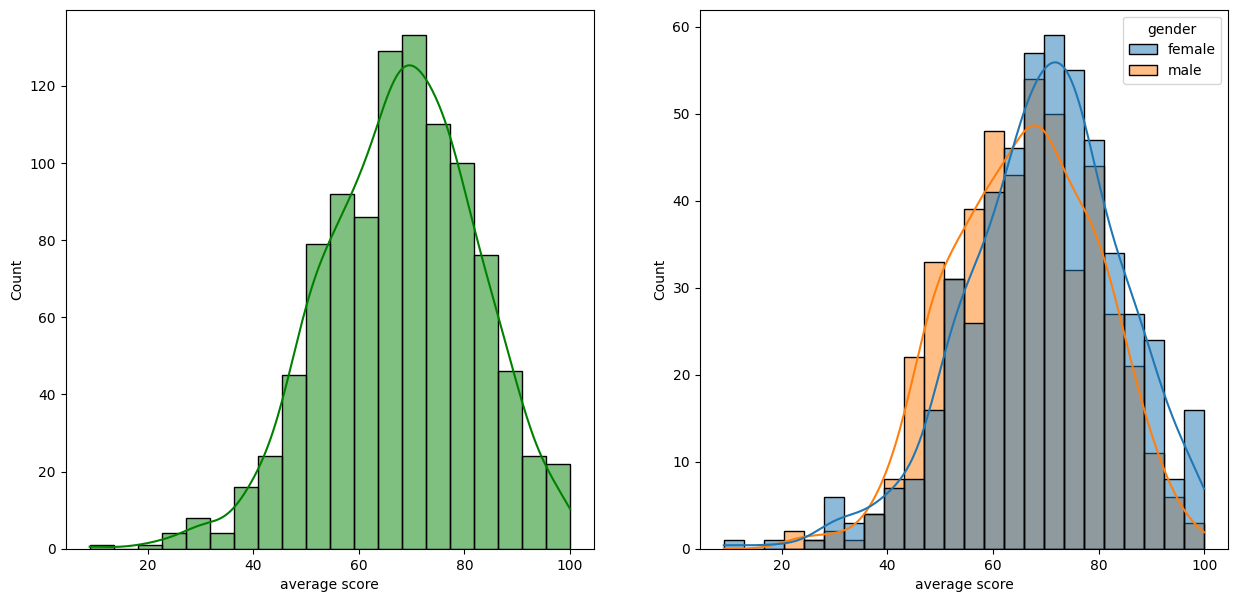

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'average score', bins=20, kde=True, color='g')
plt.subplot(1, 2, 2)

sns.histplot(data = df, x = 'average score', kde=True, hue='gender')
plt.show()

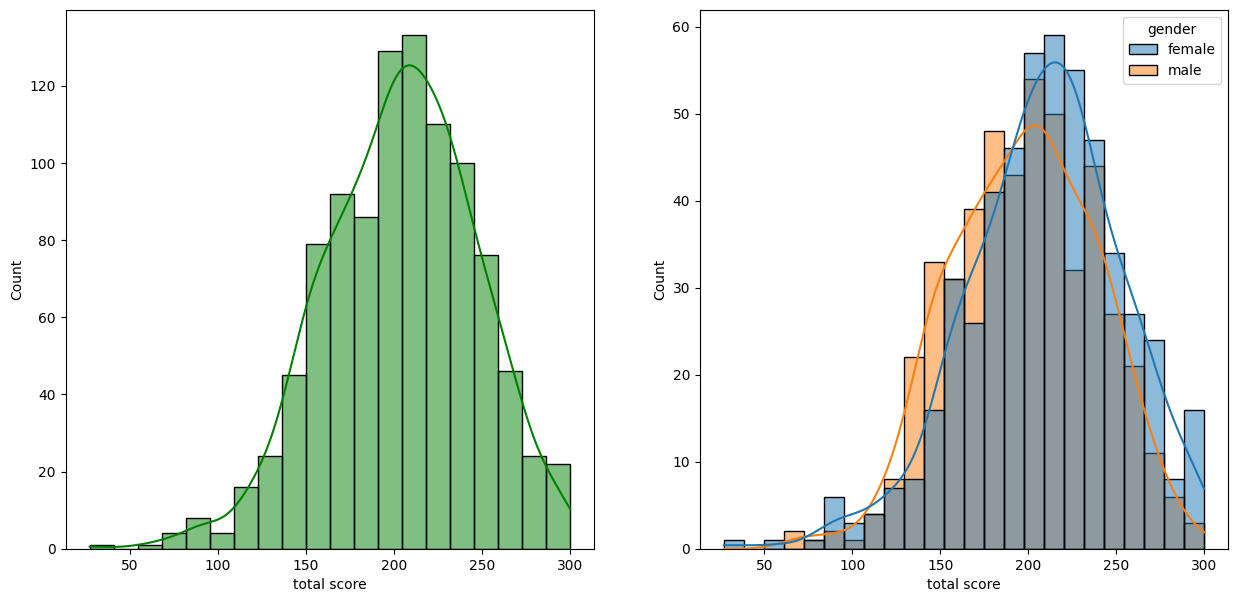

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'total score', bins=20, kde=True, color='g')
plt.subplot(1, 2, 2)

sns.histplot(data = df, x = 'total score', kde=True, hue='gender')
plt.show()